In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

SD3

In [2]:
# bias calculation

df_g3 = pd.read_csv('G_skintone_count_3.csv')
df_se3 = pd.read_csv('SE_skintone_count_3.csv')

g3_lighter_skin = df_g3['1'].sum() + df_g3['2'].sum() + df_g3['3'].sum()
g3_darker_skin = df_g3['4'].sum() + df_g3['5'].sum() + df_g3['6'].sum()

se3_lighter_skin = df_se3['1'].sum() + df_se3['2'].sum() + df_se3['3'].sum()
se3_darker_skin = df_se3['4'].sum() + df_se3['5'].sum() + df_se3['6'].sum()


total_g3 = g3_lighter_skin + g3_darker_skin
total_se3 = se3_lighter_skin + se3_darker_skin

percentage_light_g3 = g3_lighter_skin*100/total_g3
percentage_dark_g3 = g3_darker_skin*100/total_g3

percentage_light_se3 = se3_lighter_skin*100/total_se3
percentage_dark_se3 = se3_darker_skin*100/total_se3 

SD2

In [3]:
# bias calculation

df_g2 = pd.read_csv('G_skintone_count_2.csv')
df_se2 = pd.read_csv('SE_skintone_count_2.csv')

g2_lighter_skin = df_g2['1'].sum() + df_g2['2'].sum() + df_g2['3'].sum()
g2_darker_skin = df_g2['4'].sum() + df_g2['5'].sum() + df_g2['6'].sum()

se2_lighter_skin = df_se2['1'].sum() + df_se2['2'].sum() + df_se2['3'].sum()
se2_darker_skin = df_se2['4'].sum() + df_se2['5'].sum() + df_se2['6'].sum()


total_g2 = g2_lighter_skin + g2_darker_skin
total_se2 = se2_lighter_skin + se2_darker_skin

percentage_light_g2 = g2_lighter_skin*100/total_g2
percentage_dark_g2 = g2_darker_skin*100/total_g2

percentage_light_se2 = se2_lighter_skin*100/total_se2
percentage_dark_se2 = se2_darker_skin*100/total_se2

Overall

In [4]:
# overall bias in view for all versions

total_light_3 = g3_lighter_skin + se3_lighter_skin
total_dark_3 = g3_darker_skin + se3_darker_skin
total_3 = total_light_3 + total_dark_3

percentage_light_3 = total_light_3*100/total_3
percentage_dark_3 = total_dark_3*100/total_3


total_light_2 = g2_lighter_skin + se2_lighter_skin
total_dark_2 = g2_darker_skin + se2_darker_skin
total_2 = total_light_2 + total_dark_2

percentage_light_2 = total_light_2*100/total_2
percentage_dark_2 = total_dark_2*100/total_2

Overall bias by Stable Version, Skintone and Prompt type

In [5]:
data = {
    'Version': ['SD3', 'SD3', 'SD3', 'SD3', 'SD2', 'SD2', 'SD2', 'SD2'],
    'Prompt Type': ['General', 'General', 'Software Eng.', 'Software Eng.', 'General', 'General', 'Software Eng.', 'Software Eng.'],
    'Skin Type': ['Light', 'Dark', 'Light', 'Dark', 'Light', 'Dark', 'Light', 'Dark'],
    'Percentage': [percentage_light_g3, percentage_dark_g3, percentage_light_se3, percentage_dark_se3, percentage_light_g2, percentage_dark_g2, percentage_light_se2, percentage_dark_se2]
}

df = pd.DataFrame(data)

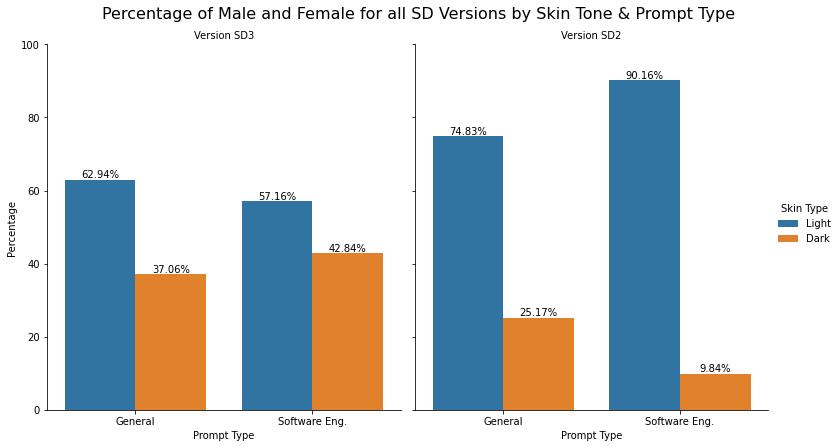

In [6]:
# Plotting
g = sns.catplot(x="Prompt Type", y="Percentage", hue="Skin Type", col="Version",
                data=df, kind="bar", height=6, aspect=0.9)

g.set_axis_labels("Prompt Type", "Percentage")
g.set_titles("Version {col_name}")
g.set(ylim=(0, 100))

# Adding a centered title
plt.suptitle('Percentage of Male and Female for all SD Versions by Skin Tone & Prompt Type', fontsize=16, y=1.03)

# Adding labels to each bar
for ax in g.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
                f'{p.get_height():.2f}%', ha='center', va='bottom')

plt.show()

Overall Bias by Stable Version and Skin Type

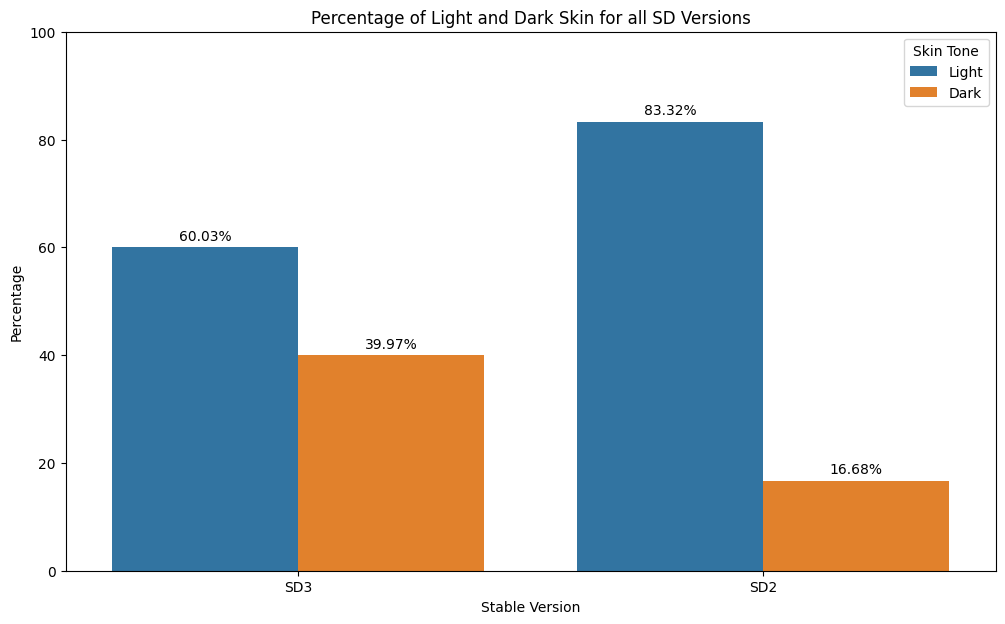

In [7]:
data_overall = {
    'Stable Version': ['SD3', 'SD3', 'SD2', 'SD2'],
    'Skin Tone': ['Light', 'Dark', 'Light', 'Dark'],
    'Percentage': [percentage_light_3, percentage_dark_3, percentage_light_2, percentage_dark_2]
}

df_overall_bias = pd.DataFrame(data_overall)

# Plotting
plt.figure(figsize=(12, 7))
graph_overall = sns.barplot(x='Stable Version', y='Percentage', hue='Skin Tone', data=df_overall_bias)
plt.title('Percentage of Light and Dark Skin for all SD Versions')

# Adding labels to the bars
for p in graph_overall.patches:
    graph_overall.annotate(f'{p.get_height():.2f}%', 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='bottom', 
                           fontsize=10, color='black', xytext=(0, 3), 
                           textcoords='offset points')

plt.ylim(0, 100)
plt.show()